# Overview

For this Data curation and Analysis, I decided to go with the top 100 ranked companies and decided to investigate what kind of relation rank hold in regard to monthly revenue. I obtained my data from the following link: https://eqvista.com/fortune-500-companies-in-the-us/ .

# Importing libraries

Here we try to import certain libraries an install them if they are not installed them already.

In [108]:

try:
    from bs4 import BeautifulSoup
    import pandas as pd
    import numpy as np
    import scipy
    from matplotlib import pyplot as plt
    print ("BeautifulSoup and Pandas are already installed and imported")
except:
    import sys
    !conda install --yes --prefix {sys.prefix} bs4
    !conda install --yes --prefix {sys.prefix} pandas
    !conda install --yes --prefix {sys.prefix} numpy
    !conda install --yes --prefix {sys.prefix} matplotlib
    !conda install --yes --prefix {sys.prefix} scipy
    from bs4 import BeautifulSoup
    import pandas
    print ("BeautifulSoup and Pandas were not found. Installed them and imported")

import requests
import re


BeautifulSoup and Pandas are already installed and imported


# 2. Read the webpage and parse it with BeautifulSoup

In [109]:
opened_webpage = requests.get("https://eqvista.com/fortune-500-companies-in-the-us/")
print ("Webpage opened successfully...")

# Initialize a BeautifulSoup object to read and parse the webpage read
# This is like calling the __init__ function in BeautifulSoup
bs = BeautifulSoup(opened_webpage.content, "html.parser")
print ("Webpage loaded and parsed successfully...")
raw_data = []

Webpage opened successfully...
Webpage loaded and parsed successfully...


# 3. Extaction

Extracting data of our interest from the webpage by searching for any tables in it. Creating a new list raw_data and appending each row of the extracted raw data to it.

In [110]:
raw_data = []

# Find all the tables in the webpage page that we have just parsed
table = bs.find_all("table")

for row in table:
    line = row.text
    raw_data.append(line)
    
print(raw_data)

["\n\n\nRankCompanyRevenue($M)Market ValueEmployees\n\n\n\n\n1Walmart$559,151 $382,643 2300000\n\n\n2Amazon$386,064 $1,558,070 1298000\n\n\n3Apple$274,515 $2,050,666 147000\n\n\n4CVS Health$268,706 $98,653 256500\n\n\n5UnitedHealth Group$257,141 $351,725 330000\n\n\n6Berkshire Hathaway$245,510 $587,823 360000\n\n\n7McKesson$231,051 $31,044 70000\n\n\n8AmerisourceBergen$189,894 $24,170 21500\n\n\n9Alphabet$182,527 $1,392,562 135301\n\n\n10Exxon Mobil$181,502 $236,355 72000\n\n\n11AT&T$171,760 $215,879 230760\n\n\n12Costco Wholesale$166,761 $155,984 214500\n\n\n13Cigna$160,401 $83,976 72963\n\n\n14Cardinal Health$152,922 $17,840 48000\n\n\n15Microsoft$143,015 $1,778,228 163000\n\n\n16Walgreens Boots Alliance$139,537 $47,455 277000\n\n\n17Kroger$132,498 $27,064 465000\n\n\n18Home Depot$132,110 $328,775 504800\n\n\n19JPMorgan Chase$129,503 $464,531 255351\n\n\n20Verizon Communications$128,292 $240,633 132200\n\n\n21Ford Motor$127,144 $48,739 186000\n\n\n22General Motors$122,485 $82,795 155

# Tranformation

Here we are transforming the raw data into something we can use further. We remove all the '$' and ',' that are in the numbers and convert them to integers so the can be used for analysis in later steps. The primary purpose of this part of the code is to clean it a make it more organized, using pattern recognition.Also, to change the type of certain elements so they can be used for analysis. Here we can see that the 95th index has been edited manually. This had to be done manully as the pattern in parse_string function recognized the 3 in '3M' as part of the rank


In [114]:
def parse_string(string):
    results = []
    for string in strings:
        string = string.replace("&","and")
        string = string.replace("'","")
        string = string.replace("-","")
        string = string.replace(".","")
        string = string.replace("(","").replace(")","")

        groups = re.match(r'(\d+)([A-Za-z]+\s*[A-Za-z]*\s*[A-Za-z]*\s*[A-Za-z]*\d*)(\$[\d,]+)\s(\$[\d,]+)\s(\d+)', string)
        if groups:
            results.append([groups.group(1), groups.group(2), groups.group(3), groups.group(4), groups.group(5)])
        else:
# where one value is missing
# example Northwestern Mutual$33,782 06641
            groups = re.match(r'(\d+)([A-Za-z]+\s*[A-Za-z]*\s*[A-Za-z]*\s*[A-Za-z]*\d*)(\$[\d,]+)\s(\d+)',string)
            if groups:
                results.append([groups.group(1), groups.group(2), groups.group(3),"0", groups.group(4)])
    return results

for l in raw_data:
    data = l.split("\n")

i= ''
while i in data:
    data.remove(i)
strings= data
results = parse_string(strings)


for i in range(len(results)):
    for j in range(len(results[i])):
        if results[i][j][0] == '$':
            results[i][j] = int(results[i][j].replace('$', '').replace(',', ''))
        elif results[i][j].isdigit():
            results[i][j] = int(results[i][j])
 
# Had to do this manully as the pattern in parse_string function recognized the 3 in '3M' as part of the rank
results[95]=[96, '3M', 32184, 111642, 94987]
print(results)


[[1, 'Walmart', 559151, 382643, 2300000], [2, 'Amazon', 386064, 1558070, 1298000], [3, 'Apple', 274515, 2050666, 147000], [4, 'CVS Health', 268706, 98653, 256500], [5, 'UnitedHealth Group', 257141, 351725, 330000], [6, 'Berkshire Hathaway', 245510, 587823, 360000], [7, 'McKesson', 231051, 31044, 70000], [8, 'AmerisourceBergen', 189894, 24170, 21500], [9, 'Alphabet', 182527, 1392562, 135301], [10, 'Exxon Mobil', 181502, 236355, 72000], [11, 'ATandT', 171760, 215879, 230760], [12, 'Costco Wholesale', 166761, 155984, 214500], [13, 'Cigna', 160401, 83976, 72963], [14, 'Cardinal Health', 152922, 17840, 48000], [15, 'Microsoft', 143015, 1778228, 163000], [16, 'Walgreens Boots Alliance', 139537, 47455, 277000], [17, 'Kroger', 132498, 27064, 465000], [18, 'Home Depot', 132110, 328775, 504800], [19, 'JPMorgan Chase', 129503, 464531, 255351], [20, 'Verizon Communications', 128292, 240633, 132200], [21, 'Ford Motor', 127144, 48739, 186000], [22, 'General Motors', 122485, 82795, 155000], [23, 'Ant

#### Convert to DataFrame
Pandas is a powerful tool for data analysis and manipulation that provides a convenient and flexible way to store and organize data. One of the key data structures in Pandas is the DataFrame, which can be thought of as a table-like structure with rows and columns. Using Pandas, data can be transformed and organized into a DataFrame quickly and efficiently. Here we are going to convert our tranformed data into a DataFrame based some pre-defined column names. Here we also check for and remove, duplicates and null entries. At the end of this code we can see the DataFrame "final_data" as a CSV file called "top_100_companies.csv".

In [117]:

column_names = ["Rank", "Company","Revenue","Market Value","Employees"]
final_data = pandas.DataFrame(results, columns = column_names)
number_of_duplicates = final_data.duplicated().sum()
print (f" Number of duplicates before : {number_of_duplicates}")

# Delete duplicate rows
final_data = final_data.drop_duplicates()

number_of_duplicates = final_data.duplicated().sum()
print (f" Number of duplicates after removing : {number_of_duplicates}")

# Print a few elements in the dataframe
print(final_data.head())
final_data.info()
final_data = final_data.dropna()
final_data.info()
final_data.to_csv("top_100_companies.csv")

 Number of duplicates before : 0
 Number of duplicates after removing : 0
   Rank             Company  Revenue  Market Value  Employees
0     1             Walmart   559151        382643    2300000
1     2              Amazon   386064       1558070    1298000
2     3               Apple   274515       2050666     147000
3     4          CVS Health   268706         98653     256500
4     5  UnitedHealth Group   257141        351725     330000
<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Rank          100 non-null    int64 
 1   Company       100 non-null    object
 2   Revenue       100 non-null    int64 
 3   Market Value  100 non-null    int64 
 4   Employees     100 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 4.7+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 5 columns):
 #  

# Loading 

By importing the InteractiveShell module from the IPython core library and setting the ast_node_interactivity parameter to "all", we can see all output in the interactive shell. We are then using the Pandas library to read a CSV file called "top_100_companies.csv" into a DataFrame named "compainies_df". Finally, we are calling the info() method on the DataFrame to display a summary of its structure and contents.

In [118]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

compainies_df = pd.read_csv("top_100_companies.csv")

compainies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    100 non-null    int64 
 1   Rank          100 non-null    int64 
 2   Company       100 non-null    object
 3   Revenue       100 non-null    int64 
 4   Market Value  100 non-null    int64 
 5   Employees     100 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 4.8+ KB


# Desciptive statistics

This code creates two new variables named "rank" and "revenue" by selecting the "Rank" and "Revenue" columns respectively from the DataFrame "compainies_df". You can then use the describe() method on the "revenue" variable to show summary statistics, such as the count, mean, standard deviation, minimum, and maximum values of the "Revenue" column.

In [119]:
rank = compainies_df["Rank"]
revenue = compainies_df["Revenue"]
revenue.describe()


count       100.000000
mean      89995.720000
std       79663.375318
min       31536.000000
25%       42371.000000
50%       64871.500000
75%      104282.250000
max      559151.000000
Name: Revenue, dtype: float64

# Graphing/Plotting

This code is using the Matplotlib library to create a scatter plot of the "Rank" and "Revenue" variables that were created earlier from the DataFrame "compainies_df". The plt.xlim() method is used to set the x-axis limits to a range of 0 to 100, and the plt.scatter() method is used to create the scatter plot with markers in the shape of stars. Finally, plt.xlabel(), plt.ylabel(), and plt.title() methods are used to label the x-axis, y-axis, and title of the plot respectively. Here we can see as the rank increases the monthly revenue decreasing, indicating that the have a negative correlation.

(0.0, 100.0)

Text(0.5, 0, 'Rank')

Text(0, 0.5, 'Montly Revenue')

Text(0.5, 1.0, 'Rank vs revenue')

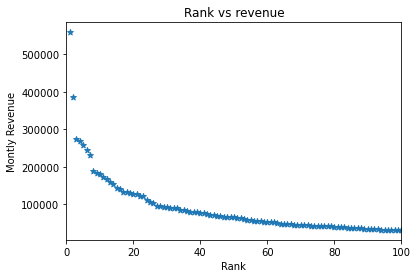

In [120]:

plt.xlim([0, 100])
plt.scatter(rank,revenue, marker="*")

plt.xlabel("Rank")
plt.ylabel("Montly Revenue")

# We can add a title too
plt.title("Rank vs revenue")

# Box plot

Form this boxplot we can tell that majority of the top 100 ranked companies acquired a monthly revenues below $200,000. There appear to be a quite a few outliers. Given the strong negative correclation that we saw in the scatter plot above, we can resonably infer that all the outliers are ranked higer that the companies that are represented between max and min of the boxplot.

{'whiskers': [<matplotlib.lines.Line2D at 0x7fa80b29de50>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa80b2af4f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fa80b29da00>],
 'medians': [<matplotlib.lines.Line2D at 0x7fa80b2afc10>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fa80b2affa0>],
 'means': []}

Text(0.5, 0, 'Revenue')

Text(0, 0.5, 'Revenue in $')

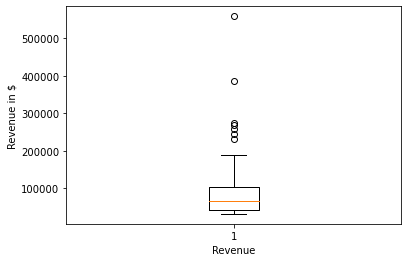

In [121]:
plt.boxplot(revenue)

plt.xlabel("Revenue")
plt.ylabel("Revenue in $")